# _automaton_.shortest(_num_ = 0, _len_ = 0)

Return a (finite) approximation of the behavior of the automaton.  In other words, compute the polynomial of the first accepted words (according to the shortlex order), and their associated weight.

Arguments:
- `num` the number of words to find (there might be fewer).  `0` stands for $\infty$ if `len` is specified, 1 otherwise.
- `len` the maximum length of the words to find. `0` stands for $\infty$.

Default values are handled as follows:
<table>
    <tr>
        <td></td>
        <td>len = 0</td>
        <td>len = $\ell$</td>
    </tr>
    <tr>
        <td>num = 0</td>
        <td>$1, \infty$</td>
        <td>$\infty, \ell$</td>
    </tr>
    <tr>
        <td>num = $n$</td>
        <td>$n, \infty$</td>
        <td>$n, \ell$</td>
    </tr>
</table>

Preconditions:
- the labelset is free

See also:
- [_automaton_.eval](automaton.eval.ipynb)

## Examples

In [1]:
import vcsn

:0: FutureWarning: IPython widgets are experimental and may change in the future.


<IPython.core.display.Javascript object>

### Boolean Automata

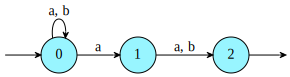

In [2]:
a = vcsn.context('lal_char(ab), b').de_bruijn(1)
a

Calling `a.shortest()` is equivalent to `a.shortest(1)` which is equivalent to `a.shortest(1, 0)`: find the shortest word, whatever its length:

In [3]:
a.shortest()

aa

To get the first four words, use `a.shortest(4)` (or `a.shortest(len = 4)`):

In [4]:
a.shortest(4)

aa + ab + aaa + aab

The words with at most four letters:

In [5]:
a.shortest(len = 4)

aa + ab + aaa + aab + baa + bab + aaaa + aaab + abaa + abab + baaa + baab + bbaa + bbab

At most 10 words of at most 4 letters:

In [6]:
a.shortest(num = 10, len = 4)

aa + ab + aaa + aab + baa + bab + aaaa + aaab + abaa + abab

At most 10 words of at most 3 letters:

In [7]:
a.shortest(num = 10, len = 3)

aa + ab + aaa + aab + baa + bab

### Weighted Automata

The following automaton decodes binary numbers.

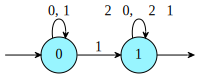

In [8]:
%%automaton bin
context = "lal_char(01), z"
$ -> 0
0 -> 0 0, 1
0 -> 1 1
1 -> $
1 -> 1 <2>0, <2>1

In [9]:
bin.shortest(len = 3)

1 + 01 + <2>10 + <3>11 + 001 + <2>010 + <3>011 + <4>100 + <5>101 + <6>110 + <7>111

In [10]:
bin.shortest(num = 10)

1 + 01 + <2>10 + <3>11 + 001 + <2>010 + <3>011 + <4>100 + <5>101 + <6>110